In [7]:
# Please use the following code to visualize your predictions before submission
# You should have already validated the prediction format using validate_prediction_format.

In [1]:
import sys
sys.path.append('..')
from util.dataset_util import read_video, read_cam_params, project_3d_to_2d, plot_over_image, read_data, show_image, load_data_from_pickle

In [2]:
data_root = '/Users/andreaongaro/Documents/Documenti Andrea Ongaro/Magistrale/Torino/Corsi/2_ANNO/ComputerVision/Project/lcn-pose/dataset'
data_pred_path = '/Users/andreaongaro/Documents/Documenti Andrea Ongaro/Magistrale/Torino/Corsi/2_ANNO/ComputerVision/Project/lcn-pose/experiment/test1/result_gt.pkl'  # prediction file to be submitted; replace this with your prediction
subset = 'test' # select from ['train']
subj_name = 's01_v' # subject names for 'train' subset
action_name = '160'# action names
camera_name = '60457274' # select from ['50591643', '58860488', '60457274', '65906101']
# path to the parent directory (contains test/ meta/)
dataset_name = 'humansc3d'

In [3]:
frames, j3ds, cam_params, gpp_data, smplx_param_data, annotations = read_data(data_root, 
                                                                            dataset_name, 
                                                                            subset, 
                                                                            subj_name, 
                                                                            action_name, 
                                                                            camera_name)

# Test Version

DATI 3D
[[-0.148114    0.115244    0.539027  ]
 [-0.146342    0.243877    0.500721  ]
 [ 0.269352    0.335186    0.617918  ]
 [ 0.233261   -0.0976077   0.511819  ]
 [-0.148401   -0.0137743   0.576053  ]
 [ 0.277443    0.0152696   0.463413  ]
 [ 0.276056   -0.0109529   0.0171163 ]
 [-0.185915    0.123545    0.774417  ]
 [-0.158511    0.148208    1.02434   ]
 [-0.0885732   0.150256    1.12088   ]
 [-0.118329    0.164544    1.23104   ]
 [-0.13943     0.283224    0.948229  ]
 [ 0.0638862   0.294538    0.749451  ]
 [ 0.274418    0.182278    0.672793  ]
 [-0.156425    0.00561507  0.960707  ]
 [ 0.0131869  -0.0722241   0.745879  ]
 [ 0.23431    -0.0151676   0.642673  ]]
DATI 3D CONVERTITI
[[-1.79356990e-01  1.63300413e-01  4.61516812e+00]
 [-6.35308809e-02  1.89279531e-01  4.67782860e+00]
 [ 2.05289290e-01  1.31338043e-01  4.33249909e+00]
 [-1.95474726e-01  2.70157165e-01  4.19112229e+00]
 [-2.94837655e-01  1.38850277e-01  4.55126870e+00]
 [-7.43117132e-02  3.14237730e-01  4.21144231e+00]
 [-

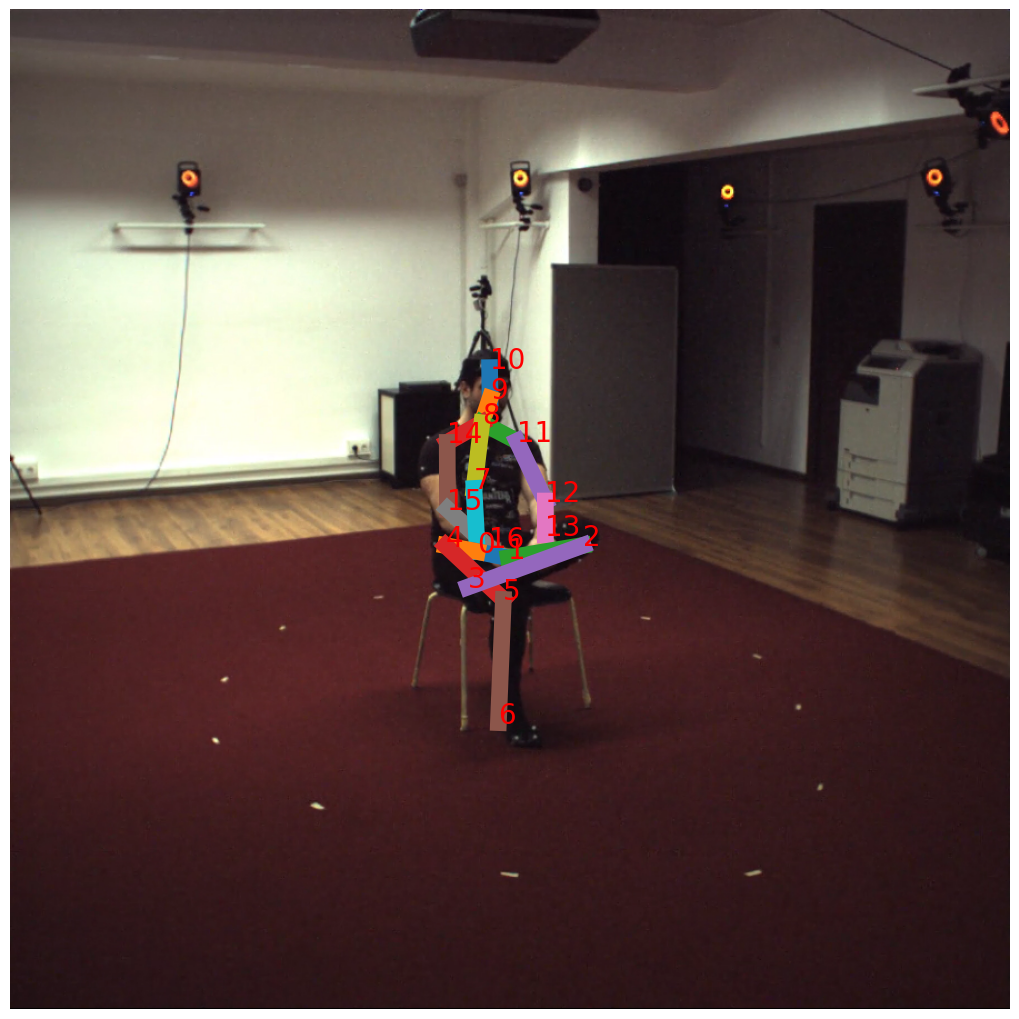

In [4]:
import numpy as np
frame_id = annotations[action_name]['fr_id']
j3d = j3ds[frame_id][:17]
R = cam_params['extrinsics']['R']
T = cam_params['extrinsics']['T']

print("DATI 3D")
print(j3d)
j3d_in_camera = np.matmul(np.array(j3d) - cam_params['extrinsics']['T'], np.transpose(cam_params['extrinsics']['R']))
print("DATI 3D CONVERTITI")
print(j3d_in_camera)
frame = frames[frame_id]
j2d_camera = project_3d_to_2d(j3d_in_camera, cam_params['intrinsics_w_distortion'], 'w_distortion')
print("DATI 2D")
print(j2d_camera)
plot_over_image(frame, j2d_camera, path_to_write="/Users/andreaongaro/Documents/Documenti Andrea Ongaro/Magistrale/Torino/Corsi/2_ANNO/ComputerVision/Project/lcn-pose/visualization/images")

In [5]:
j3ds = load_data_from_pickle(data_pred_path)
frame_id = int(action_name) - 139

# Predicted Version

(3, 3)
(1, 3)
(3, 3)
DATI 3D
[[ 2.27599412e+02  7.04066977e+02 -1.49904808e-02]
 [ 2.36417741e+02  9.69841629e+02 -3.62888686e+01]
 [ 1.21330625e+03  1.14178723e+03  1.52621955e+02]
 [ 1.59124994e+04  1.73703728e+04 -8.98701668e+02]
 [ 2.20120162e+02  4.56783794e+02  3.23566720e+01]
 [ 1.11710936e+03  3.02215531e+02  1.11549906e+02]
 [ 1.19774952e+04 -2.96274447e+03 -8.13143373e+02]
 [ 5.24317296e+02  6.33026361e+02  6.14516139e+02]
 [ 7.56344438e+02  6.04738690e+02  1.22461200e+03]
 [ 8.83523405e+02  5.88650130e+02  1.28584361e+03]
 [ 8.41614366e+02  5.77889360e+02  1.56079328e+03]
 [ 7.63337821e+02  8.01996559e+02  1.12609649e+03]
 [ 9.55807626e+02  9.89798695e+02  6.74638271e+02]
 [ 1.01034194e+03  6.46018431e+02  5.15088797e+02]
 [ 7.22636476e+02  4.27258059e+02  1.14264965e+03]
 [ 9.30633396e+02  3.19890171e+02  7.10651338e+02]
 [ 1.02395940e+03  5.76739267e+02  5.14749289e+02]]
DATI 3D CONVERTITI
[[ 7.30378261e+02 -2.87025316e+01  1.18059494e+02]
 [ 9.71555510e+02 -1.63543294e+01

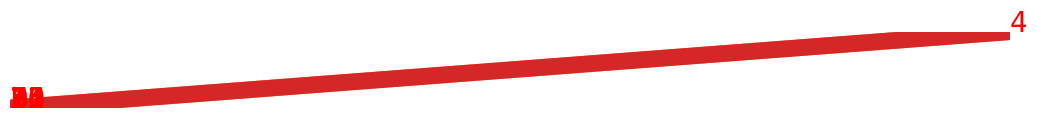

In [6]:
import numpy as np
frame_id = annotations[action_name]['fr_id']
j3d = j3ds[frame_id]
R = cam_params['extrinsics']['R']
T = cam_params['extrinsics']['T']
print(R.shape)
print(T.shape)
print(np.transpose(R).shape)
# Convert 3D joint coordinates to camera coordinates
# Note: The camera extrinsics are assumed to be in the format [R|T], where R is the rotation matrix and T is the translation vector.
# The translation vector T is subtracted from the 3D joint coordinates before applying the rotation.
# This is a common convention in computer vision, but you should verify that this is the case for your specific dataset.

print("DATI 3D")
print(j3d)
j3d_in_camera = np.matmul(np.array(j3d) - cam_params['extrinsics']['T'], np.transpose(cam_params['extrinsics']['R']))
print("DATI 3D CONVERTITI")
print(j3d_in_camera)
frame = frames[frame_id]
j2d_camera = project_3d_to_2d(j3d_in_camera, cam_params['intrinsics_w_distortion'], 'w_distortion')
print("DATI 2D")
print(j2d_camera)
plot_over_image(frame, j2d_camera)